<a href="https://colab.research.google.com/github/seshadwi/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Akses folder image pada google drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Transformasi Linier Brightness

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness.

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan :  50


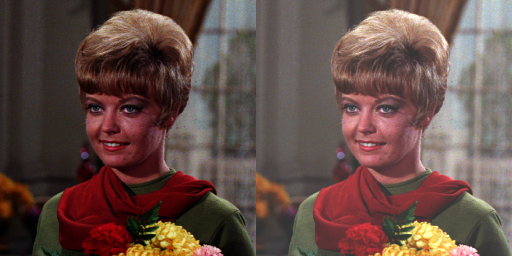

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')
try:
    brightness = int(input('Masukkan nilai kecerahan :  '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
          brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Transformasi Contrast

Formula: g(x,y)=a*f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255] : 60
Masukkan kontras [1.0 - 3.0] : 1.5


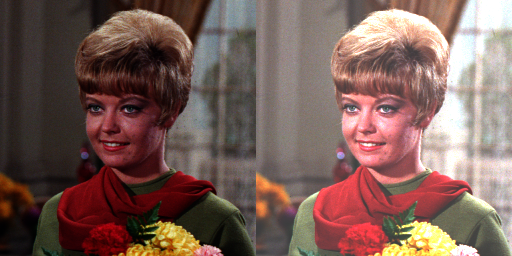

In [5]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

try:
  brightness = float(input('Masukkan tingkat kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))

except ValueError:
  print('Error, Not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

# Akses per pixel 
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
          contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

# Tampilkan frame 

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)


# Transformasi Logarithmic Brightness

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------
Masukkan nilai kecerahan : 40


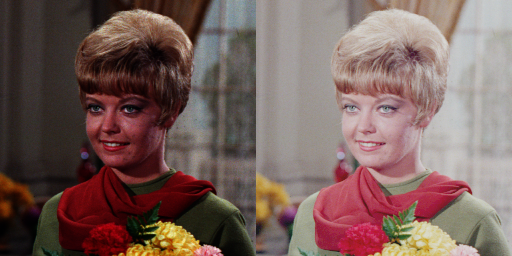

In [6]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))

except ValueError:
  print('Error, Not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel 
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
          brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

# Tampilkan frame
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Implementasi Transformasi Grayscale

Transformasi berikut menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian ulasan teori.

## Averaging



Text(0.5, 1.0, '[Luminance] After')

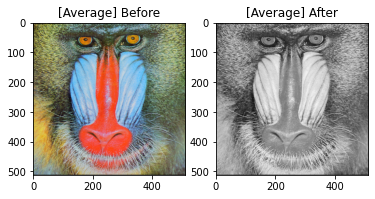

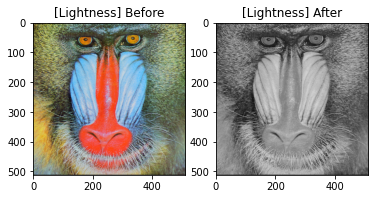

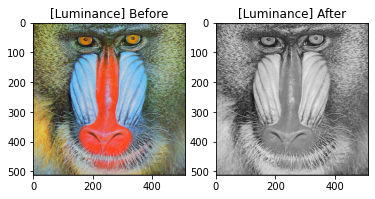

In [7]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
fix_img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
R, G, B = fix_img[:,:,0], fix_img[:,:,1], fix_img[:,:,2]

# Average
gc_average_img = np.mean(fix_img, axis=2)

# Lightness
gc_lightness_img = cv.cvtColor(original, cv.COLOR_BGR2RGB);
gc_lightness_img[:] = np.max(fix_img,axis=-1,keepdims=1)/2 + np.min(fix_img,axis=-1,keepdims=1)/2

# Luminance
gc_luminance_img = 0.2989 * R + 0.5870 * G + 0.1140 * B

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_img)
ax.set_title('[Average] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_average_img, cmap='gray')
ax.set_title('[Average] After')

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_img)
ax.set_title('[Lightness] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_lightness_img, cmap='gray')
ax.set_title('[Lightness] After')

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_img)
ax.set_title('[Luminance] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_luminance_img, cmap='gray')
ax.set_title('[Luminance] After')

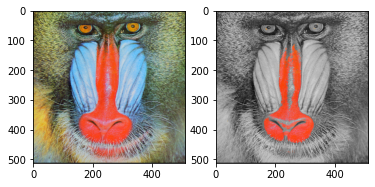

In [8]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
fix_img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
red, mask = cv.threshold(original[:,:,2], 230, 255, cv.THRESH_BINARY)

mask1 = np.zeros_like(original)
mask1[:,:, 0] = mask
mask1[:, :, 1] = mask
mask1[:, :, 2] = mask

red = cv.bitwise_and(fix_img, mask1)
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
original = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(original, 255 - mask1)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(fix_img)
ax[1].imshow(out, cmap='gray')